In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-prediction-dataset/placementdata.csv


In [27]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [28]:
warnings.filterwarnings(action='ignore')

In [29]:
df=pd.read_csv('/kaggle/input/placement-prediction-dataset/placementdata.csv')

In [30]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [31]:
df.shape

(10000, 12)

In [32]:
df.drop('StudentID',axis=1,inplace=True)

In [33]:
df[df.duplicated()]

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
595,8.5,2,3,2,90,4.8,Yes,Yes,80,84,Placed
1060,8.7,2,3,2,90,4.8,Yes,Yes,79,85,Placed
1887,8.1,2,3,2,90,4.8,Yes,Yes,84,86,Placed
1953,8.5,2,3,2,90,4.8,Yes,Yes,81,85,Placed
2743,8.3,2,3,2,90,4.8,Yes,Yes,80,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...
9820,8.2,1,3,2,90,4.8,Yes,Yes,81,83,Placed
9902,8.3,2,3,2,90,4.8,Yes,Yes,80,84,Placed
9953,8.4,2,3,2,90,4.8,Yes,Yes,79,85,Placed
9977,8.3,2,3,2,90,4.8,Yes,Yes,82,88,Placed


In [36]:
df=df.drop_duplicates()

In [37]:
df.dtypes

CGPA                         float64
Internships                    int64
Projects                       int64
Workshops/Certifications       int64
AptitudeTestScore              int64
SoftSkillsRating             float64
ExtracurricularActivities     object
PlacementTraining             object
SSC_Marks                      int64
HSC_Marks                      int64
PlacementStatus               object
dtype: object

In [38]:
df.isnull().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [39]:
df.describe()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000
mean,7.693946,1.042808,2.019944,1.006849,79.376209,4.320679,69.093372,74.425766
std,0.639961,0.663699,0.867118,0.903612,8.140884,0.411211,10.428709,8.901786
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


## Univariate Analysis

In [40]:
categorical_cols=['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus','Workshops/Certifications','Projects','Internships']
numerical_cols=['CGPA','AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']

CGPA


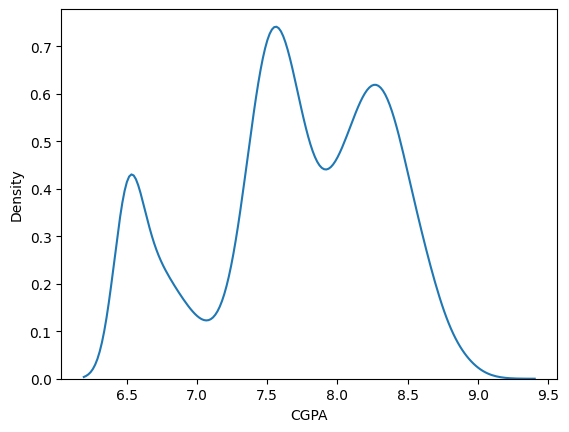

AptitudeTestScore


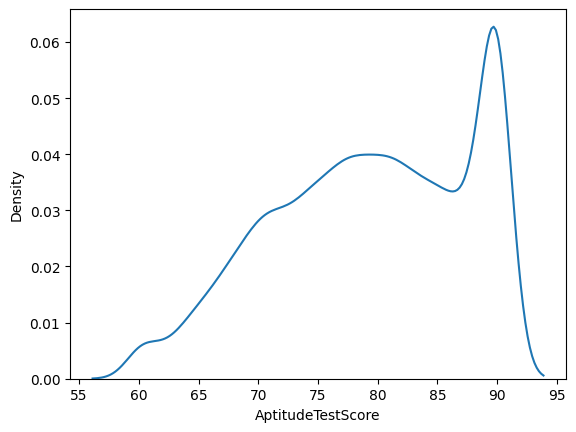

SoftSkillsRating


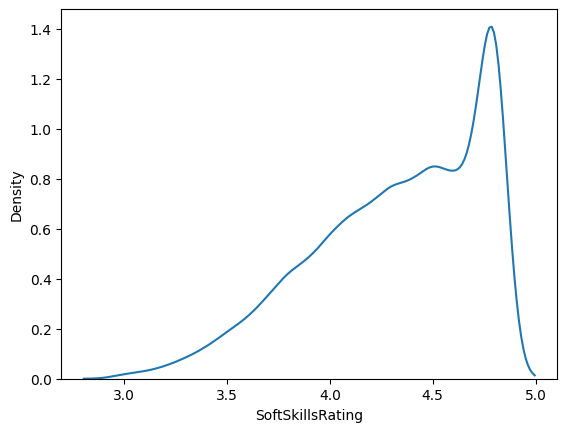

SSC_Marks


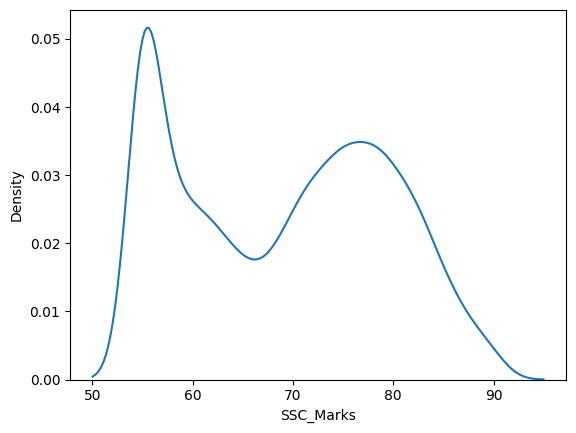

HSC_Marks


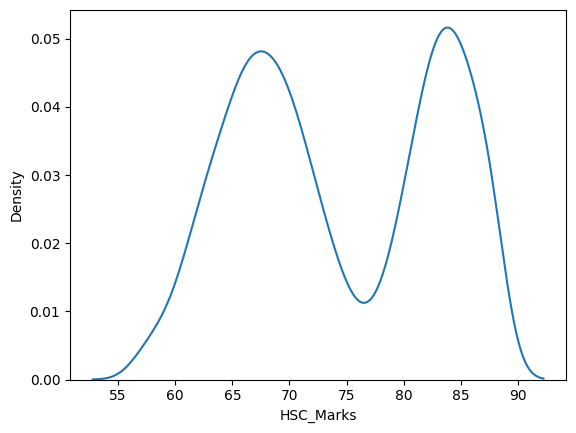

In [41]:
## Checking Distribution of Numerical Data
for col in numerical_cols:
    print(col)
    sns.kdeplot(df[col])
    # plt.plot()
    plt.show()

In [42]:
df.head(1)
# 4,5,8

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced


CGPA


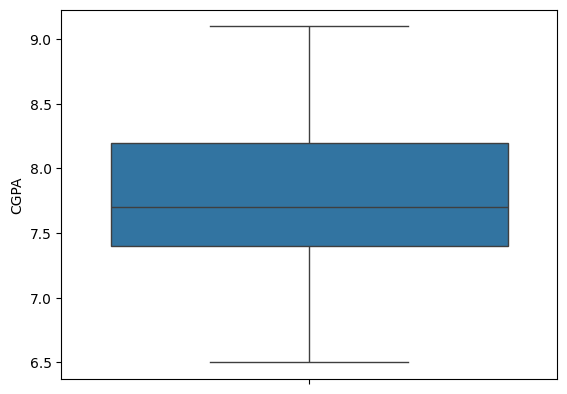

AptitudeTestScore


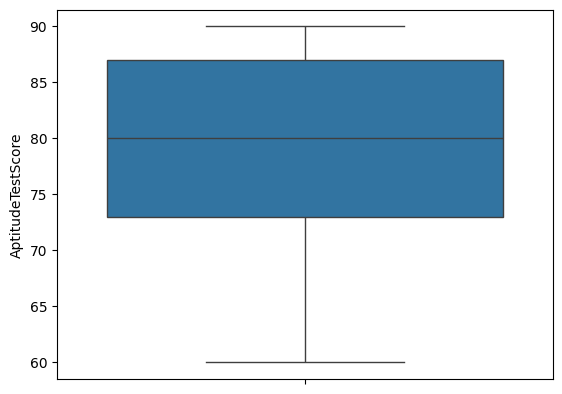

SoftSkillsRating


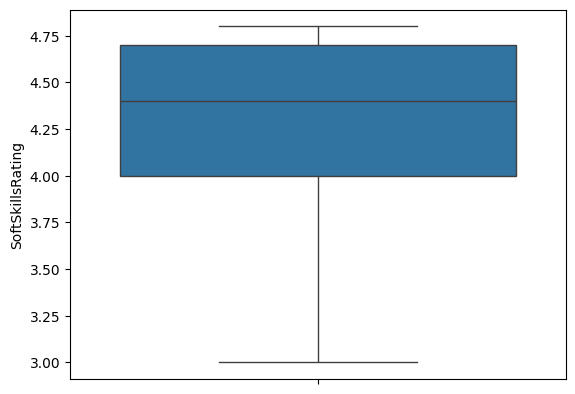

SSC_Marks


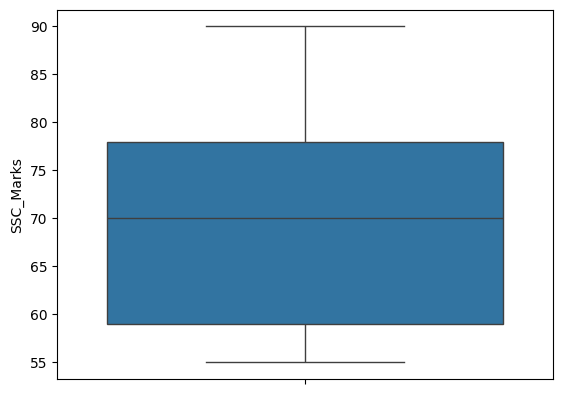

HSC_Marks


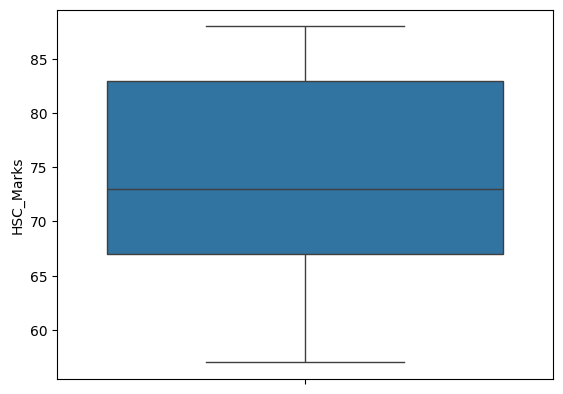

In [43]:
## Checking Distribution of Numerical Data
for col in numerical_cols:
    print(col)
    sns.boxplot(df[col])
    # plt.plot()
    plt.show()

## Conclusion:
### Analysis On Each Column:
 CPGA: Most students have CGPA between 7.1 and 7.6, 
 and the second largest group of students has CGPA between 8.1 and 8.5,
 very less people have very high CGPA

 AptitudeTest Score: Most students have apptitude test score  between 87 and 92, 
 and the second largest group of students has between 70 and 85, 
 very less people have very low Aptitude Score.


 SoftSkill Score: Most students have Softskill Skill rating lies between 4.6 and 4.9, 
 and the second largest group of students rating lies between 4 and 4.5 
 very less people have very low SoftSkill Score.



  SSC_MARKS: Most students SSC_MARKS lies between 50 and 55, 
  and the second largest group of students marks lies between 70 and 80 
  very less people have very highest and less then 50 Score.


  SSC_MARKS: Most students SSC_MARKS lies between 80 and 85, 
  and the second largest group of students marks lies between 60 and 70 
  very less people have very highest and less then 60 Score.

### Conclusion Of Analysis:
  According these numbers and my analysis, i came to the result that our data is collected from high performing and average students,

### Current Condition and Action Required:
 ApptitudeTestScore and SoftSkill Rating Cols: they are left skewed so if we use Linear Model we should required to Apply the Function Transformer  with x^2 func.
 SSC_Marks Col: it is left skewed so if we use Linear Model we should required to Apply the Function Transformer with log1p func.

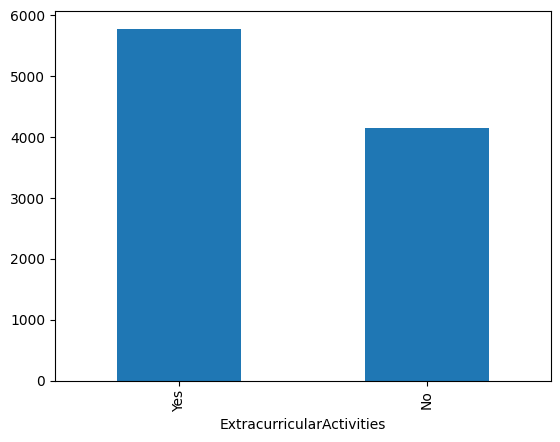

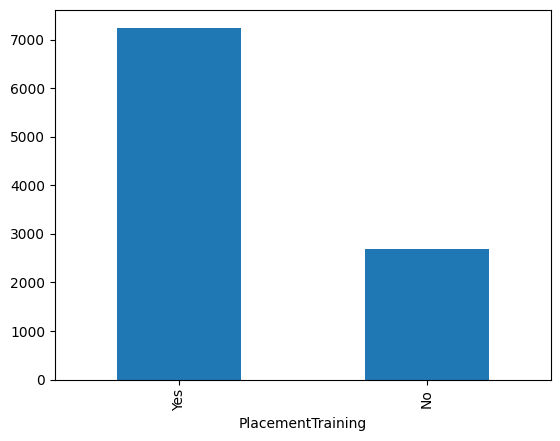

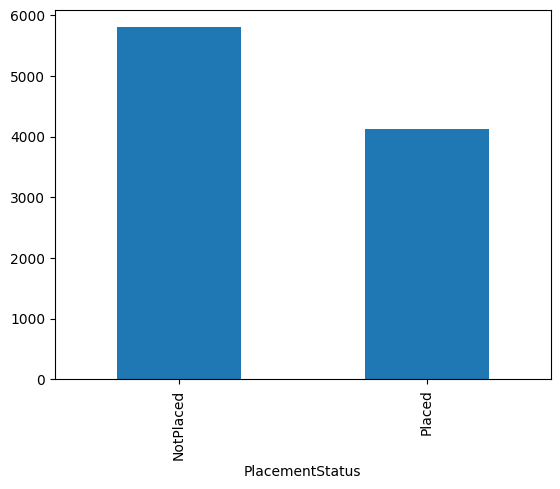

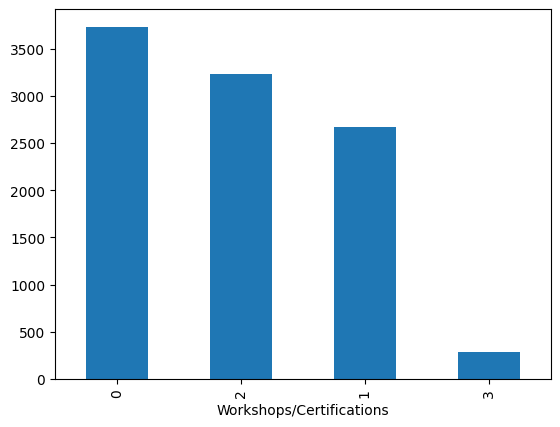

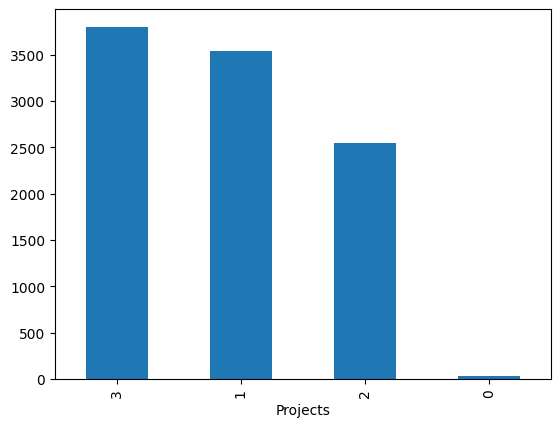

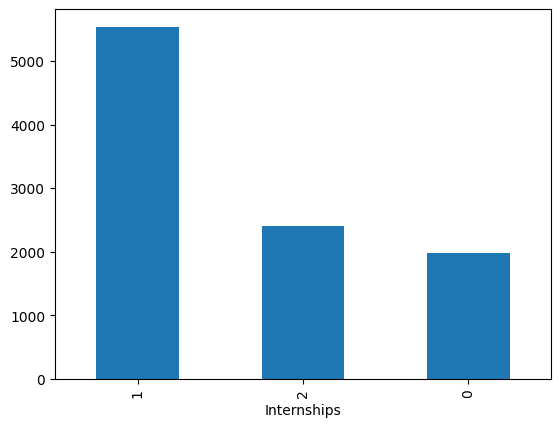

In [44]:
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    
    plt.show()

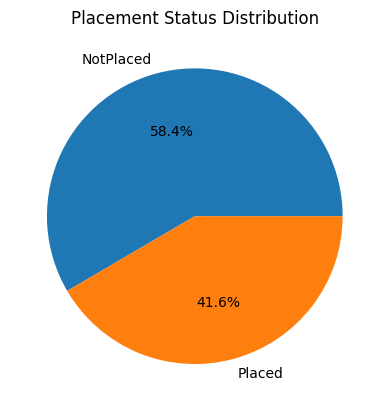

In [45]:
plt.pie(
    df['PlacementStatus'].value_counts(),
    labels=df['PlacementStatus'].value_counts().index,
    autopct='%1.1f%%'
)
plt.title('Placement Status Distribution')
plt.show()

### Analysis on Each Column:
Projects: most of the people in our dataset has builded the projects, and very few persons have very less projects
Certificate: most of the people in our dataset has 1 or 2 certificate or workshop, very less person has more then 2 certificates
placement training: most of the people in our dataset take the placement training,


Current Condition and Action Required:
Placement Status, Placement Training,and Extracurricular Activity Columns required OneHotEncoding

## Multivariate Analysis

In [46]:
categorical_cols

['ExtracurricularActivities',
 'PlacementTraining',
 'PlacementStatus',
 'Workshops/Certifications',
 'Projects',
 'Internships']

<Axes: xlabel='CGPA', ylabel='Density'>

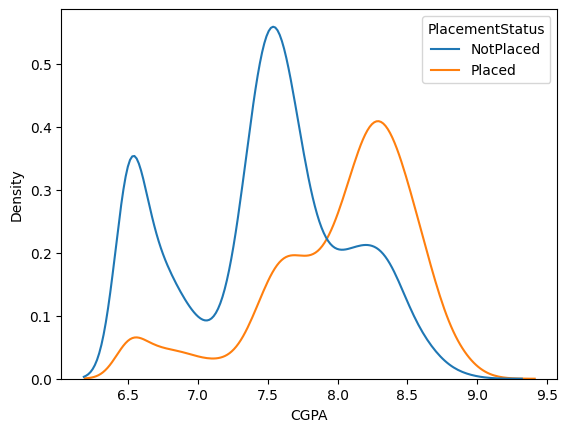

In [47]:
sns.kdeplot(x='CGPA',hue='PlacementStatus',data=df)

### Conclusion:
According to this Analysis if a person have a CGPA has Higher CGPA, They have higher chance that they should placed, mostly if CGPA greater then 7.5

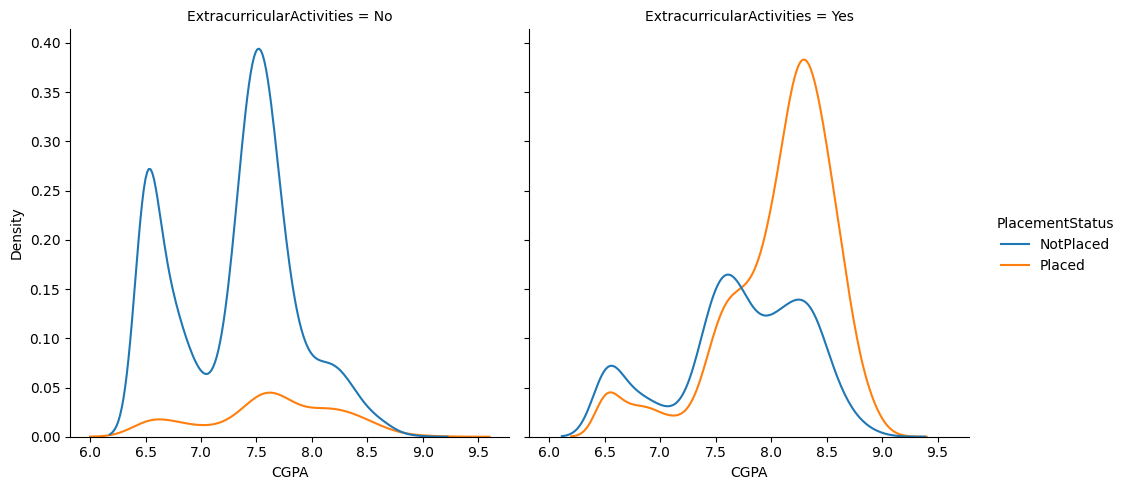

In [48]:
# sns.kdeplot(x='CGPA',hue='PlacementStatus',data=df)
sns.displot(data=df, x='CGPA', hue='PlacementStatus', col='ExtracurricularActivities' ,kind='kde')

### Conclusion:
According to this Analysis if a person has higher CGPA and also they are included in Extracurriculum Activities, they have higher chance that they should placed.

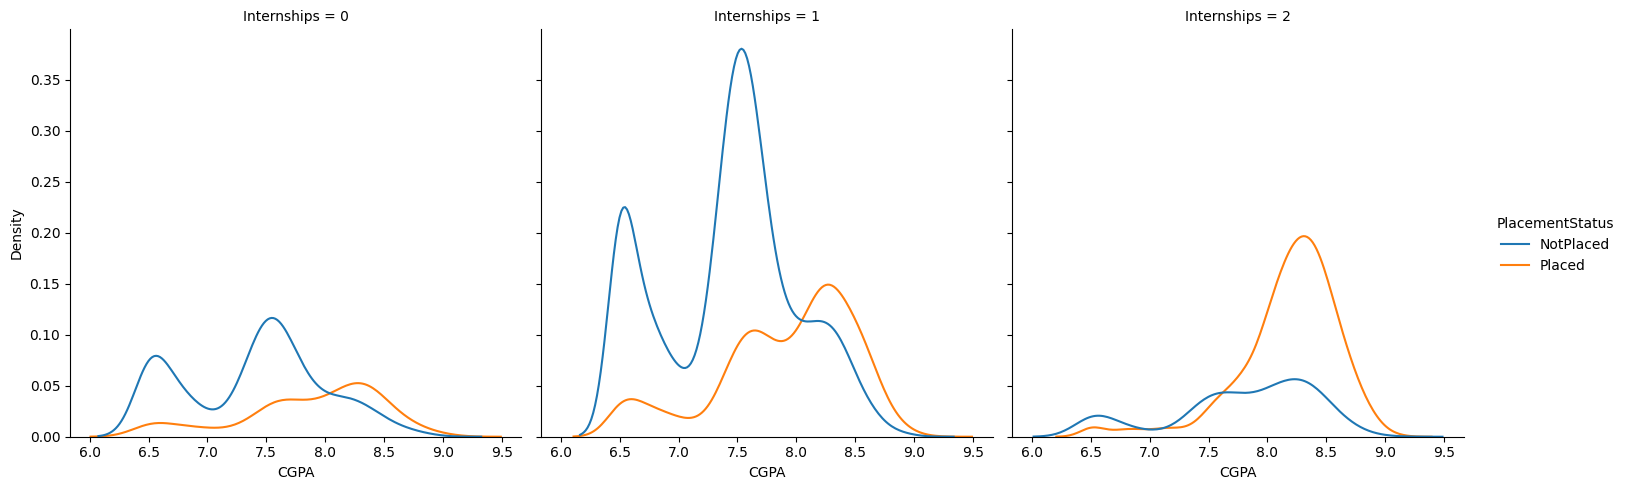

In [49]:
sns.displot(data=df, x='CGPA', hue='PlacementStatus', col='Internships' ,kind='kde')

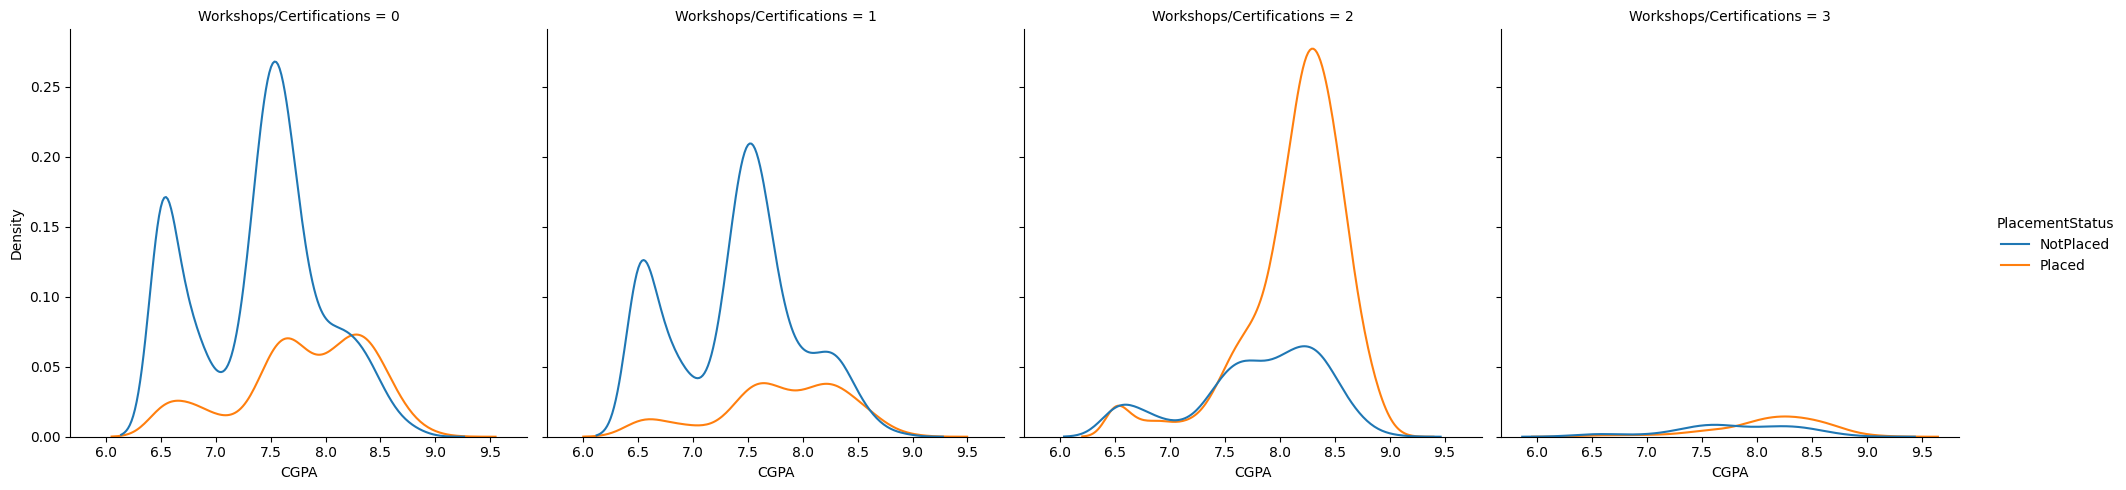

In [50]:
sns.displot(data=df, x='CGPA', hue='PlacementStatus', col='Workshops/Certifications' ,kind='kde')

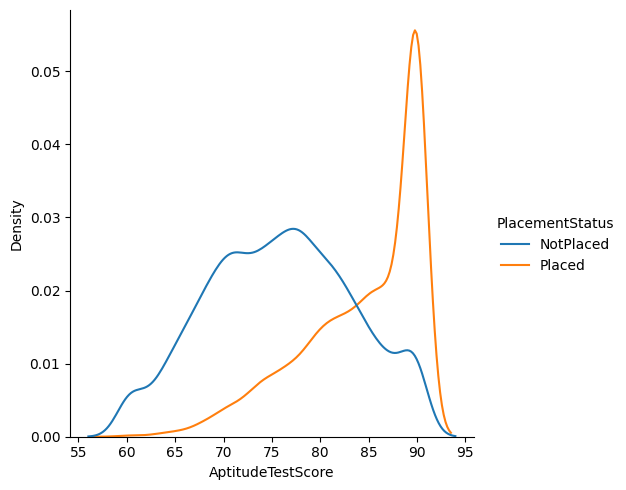

In [51]:
sns.displot(data=df, x='AptitudeTestScore', hue='PlacementStatus',kind='kde')

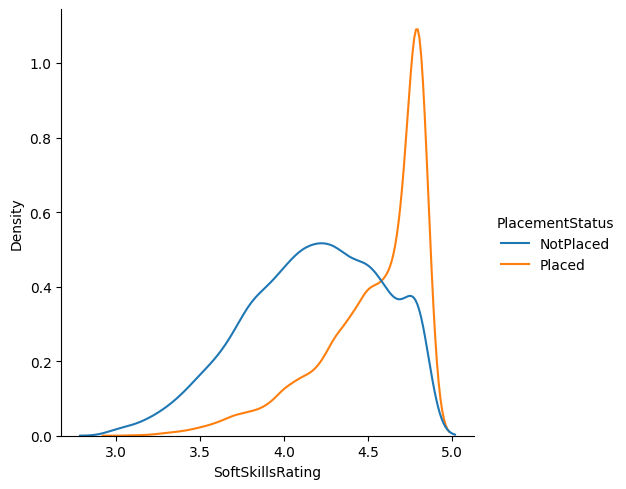

In [52]:
sns.displot(data=df, x='SoftSkillsRating', hue='PlacementStatus',kind='kde')

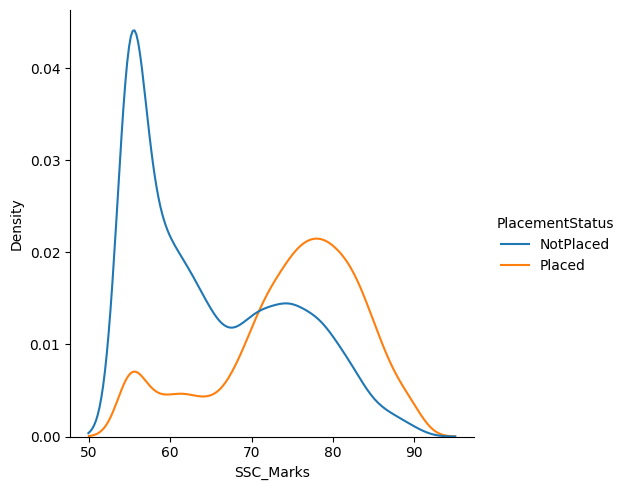

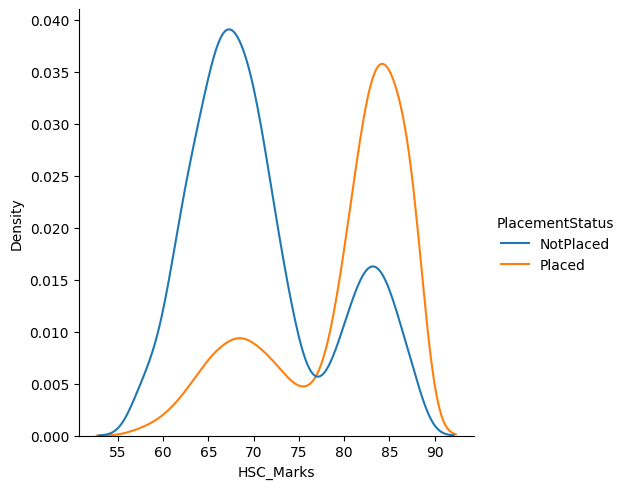

In [53]:
sns.displot(data=df, x='SSC_Marks', hue='PlacementStatus',kind='kde')
sns.displot(data=df, x='HSC_Marks', hue='PlacementStatus',kind='kde')	

In [54]:
df.head(1)

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced


In [55]:
# for i in range(df.shape[0]):
#     if(df.loc[i,'SoftSkillsRating']<=3.5 and df.loc[i,'ExtracurricularActivities']=='No'):
#         print('Introvert')
#         print(i,'==>',df.loc[i,'SoftSkillsRating'],' ==> ',df.loc[i,'ExtracurricularActivities'])
#     else :
#         print('extrovert')
#         print(i,'==>',df.loc[i,'SoftSkillsRating'],' ==> ',df.loc[i,'ExtracurricularActivities'])
#     # print(i)

####  Encoding the Target Column

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
lbl=LabelEncoder()
lbl.fit(df['PlacementStatus'])

LabelEncoder()

In [58]:
df['PlacementStatus']=lbl.transform(df['PlacementStatus'])

<Axes: >

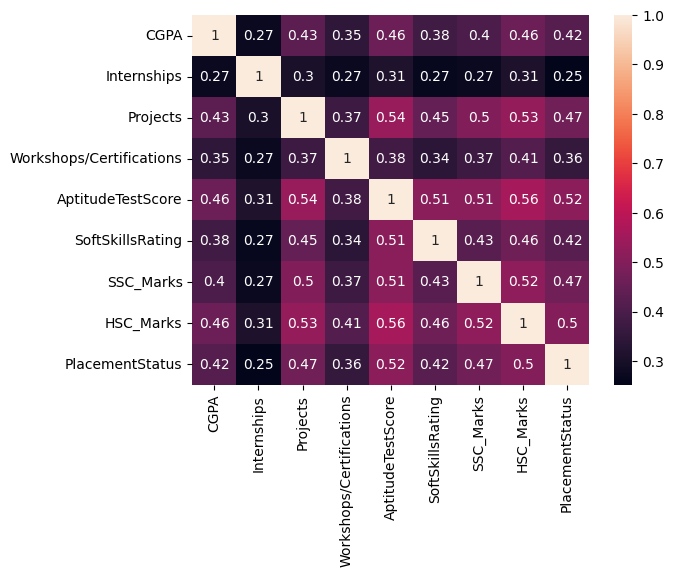

In [59]:
sns.heatmap(df.drop(columns=['ExtracurricularActivities','PlacementTraining']).corr(),annot=True)

In [60]:
x=df.drop('PlacementStatus',axis=1)
y=df['PlacementStatus']

In [95]:
x['TechnicalExposureScore']=x['Internships']+x['Projects']+x['Workshops/Certifications']

In [124]:
x.drop(columns=['Internships','Projects','Workshops/Certifications'],axis=1,inplace=True)

In [126]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,accuracy_score,f1_score
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer,PowerTransformer,MinMaxScaler


In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True,random_state=404)

In [128]:
x_train.shape

(7446, 8)

In [129]:
x_test.shape

(2482, 8)

In [130]:
x.head(1)

,CGPA,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,TechnicalExposureScore
0,7.5,65,4.4,No,No,61,79,3


In [131]:
tf = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), [3, 4]),  # categorical cols
        # ('making normal distribution',PowerTransformer(method='yeo-johnson'),[4,5,8]),
        ('min max scaler', MinMaxScaler(),[0,1,2,5,6] ) , # numerical cols
        # ('standard scaler', StandardScaler(),[1,2,3,10] )  # numerical cols
    ],
    remainder='passthrough'
)

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [133]:
model=LogisticRegression(max_iter=500,penalty='l2',class_weight='balanced')

In [134]:
pipe=Pipeline(steps=[
    ('transformation',tf),
    ('model',model)
])

In [135]:
pipe

Pipeline(steps=[('transformation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [3, 4]),
                                                 ('min max scaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 5, 6])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=500))])

In [149]:
x_train.head(1)

,CGPA,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,TechnicalExposureScore
7866,6.8,71,4.4,No,No,60,68,2


In [137]:
pipe.fit(x_train,y_train)
y_test_pred=pipe.predict(x_test)
y_train_pred=pipe.predict(x_train)

print('training accuracy  ',accuracy_score(y_train,y_train_pred))
print('testing accuracy  ',accuracy_score(y_test,y_test_pred))

training accuracy   0.7945205479452054
testing accuracy   0.7808219178082192


### RandomForest 

In [138]:
pipe=Pipeline(steps=[
    ('transformation',tf),
    ('model',RandomForestClassifier(n_estimators=100,max_depth=3,max_features=0.5,bootstrap=True,max_samples=0.5,class_weight='balanced'))
])

In [139]:
pipe.fit(x_train,y_train)
y_test_pred=pipe.predict(x_test)
y_train_pred=pipe.predict(x_train)

print('training accuracy  ',accuracy_score(y_train,y_train_pred))
print('testing accuracy  ',accuracy_score(y_test,y_test_pred))

training accuracy   0.7894171367177008
testing accuracy   0.7784045124899275


In [140]:
pipe.named_steps['model'].feature_importances_

array([0.23550577, 0.00875229, 0.02205002, 0.18600311, 0.01279576,
       0.05202026, 0.39528767, 0.08758512])

In [141]:
pipe.named_steps['transformation'].get_feature_names_out()


array(['onehot__ExtracurricularActivities_Yes',
       'onehot__PlacementTraining_Yes', 'min max scaler__CGPA',
       'min max scaler__AptitudeTestScore',
       'min max scaler__SoftSkillsRating', 'min max scaler__SSC_Marks',
       'min max scaler__HSC_Marks', 'remainder__TechnicalExposureScore'],
      dtype=object)

In [142]:
dict(zip(pipe.named_steps['transformation'].get_feature_names_out(),
         pipe.named_steps['model'].feature_importances_))


{'onehot__ExtracurricularActivities_Yes': np.float64(0.23550577090081315),
 'onehot__PlacementTraining_Yes': np.float64(0.008752293760450917),
 'min max scaler__CGPA': np.float64(0.022050020463200877),
 'min max scaler__AptitudeTestScore': np.float64(0.18600310898566216),
 'min max scaler__SoftSkillsRating': np.float64(0.01279576172549174),
 'min max scaler__SSC_Marks': np.float64(0.052020259288882195),
 'min max scaler__HSC_Marks': np.float64(0.3952876692061931),
 'remainder__TechnicalExposureScore': np.float64(0.08758511566930594)}

In [143]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
print(class_weights)
print(np.unique(y))

class_weights = dict(zip(np.unique(y), class_weights))
print(class_weights)

[0.85571453 1.20281076]
[0 1]
{np.int64(0): np.float64(0.8557145319772453), np.int64(1): np.float64(1.20281075842016)}


In [144]:
pipe=Pipeline(steps=[
    ('transformation',tf),
    ('model',GradientBoostingClassifier(max_depth=5,max_features=0.75,learning_rate=0.1,n_estimators=100,subsample=0.5))
])

In [145]:
pipe.fit(x_train,y_train)
y_test_pred=pipe.predict(x_test)
y_train_pred=pipe.predict(x_train)

print('training accuracy  ',accuracy_score(y_train,y_train_pred))
print('testing accuracy  ',accuracy_score(y_test,y_test_pred))

training accuracy   0.8515981735159818
testing accuracy   0.782433521353747


In [146]:
cross_val_score(pipe,x,y,cv=5,n_jobs=-1).mean()

np.float64(0.7848509846000086)

In [147]:
from xgboost import XGBRFClassifier

In [148]:
pipe=Pipeline(steps=[
    ('transformation',tf),
    ('model',XGBRFClassifier())
])


In [120]:
pipe.fit(x_train,y_train)
y_test_pred=pipe.predict(x_test)
y_train_pred=pipe.predict(x_train)

print('training accuracy  ',accuracy_score(y_train,y_train_pred))
print('testing accuracy   ',accuracy_score(y_test,y_test_pred))

training accuracy   0.820037604082729
testing accuracy    0.7900886381950041


In [63]:
dict(zip(pipe.named_steps['transformation'].get_feature_names_out(),
         pipe.named_steps['model'].feature_importances_))


{'onehot__ExtracurricularActivities_Yes': np.float32(0.20858279),
 'onehot__PlacementTraining_Yes': np.float32(0.021225818),
 'making normal distribution__AptitudeTestScore': np.float32(0.081977196),
 'making normal distribution__SoftSkillsRating': np.float32(0.014421159),
 'making normal distribution__SSC_Marks': np.float32(0.01774572),
 'scaler__CGPA': np.float32(0.016692217),
 'scaler__Internships': np.float32(0.0076300325),
 'scaler__Projects': np.float32(0.04804919),
 'scaler__Workshops/Certifications': np.float32(0.024816485),
 'scaler__AptitudeTestScore': np.float32(0.079473406),
 'scaler__SoftSkillsRating': np.float32(0.013268915),
 'scaler__SSC_Marks': np.float32(0.019548673),
 'scaler__HSC_Marks': np.float32(0.44656843)}

### According to Features Importance Filtering Columns 

In [64]:
x_train.drop(columns='Internships',axis=1,inplace=True)
x_test.drop(columns='Internships',axis=1,inplace=True)

In [65]:
x_train

,CGPA,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
9194,8.5,1,1,70,4.3,Yes,Yes,58,63
9771,8.3,3,0,83,4.7,No,No,63,81
1807,8.4,3,2,90,4.8,Yes,Yes,72,85
5188,8.1,2,0,74,4.2,No,Yes,55,67
5068,8.1,3,0,90,4.6,Yes,Yes,80,81
...,...,...,...,...,...,...,...,...,...
6031,7.6,1,0,73,4.2,No,Yes,55,69
5108,7.6,1,0,67,3.8,No,No,55,64
5302,8.2,1,0,82,4.6,Yes,Yes,74,82
5884,8.4,2,3,90,4.3,Yes,Yes,75,84


In [121]:
# x_train.

In [66]:
tf = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), [5,6]),  # categorical cols
        ('making normal distribution',PowerTransformer(method='yeo-johnson'),[3,4,7]),
        ('scaler', StandardScaler(),[0,1,2,3,4,7,8] )  # numerical cols
    ],
    remainder='passthrough'
)
pipe=Pipeline(steps=[
    ('transformation',tf),
    ('model',RandomForestClassifier(n_estimators=100,max_depth=3,max_features=0.5,bootstrap=True,max_samples=0.5,class_weight='balanced'))
])


In [67]:
pipe.fit(x_train,y_train)
y_test_pred=pipe.predict(x_test)
y_train_pred=pipe.predict(x_train)

print('training accuracy  ',accuracy_score(y_train,y_train_pred))
print('testing accuracy   ',accuracy_score(y_test,y_test_pred))

training accuracy   0.7892
testing accuracy    0.7872


In [69]:
print('classification report is ',classification_report(y_train,y_train_pred))

classification report is                precision    recall  f1-score   support

           0       0.84      0.78      0.81      4323
           1       0.73      0.80      0.76      3177

    accuracy                           0.79      7500
   macro avg       0.79      0.79      0.79      7500
weighted avg       0.79      0.79      0.79      7500



In [70]:
print('classification report is ',classification_report(y_test,y_test_pred))

classification report is                precision    recall  f1-score   support

           0       0.85      0.77      0.81      1480
           1       0.71      0.81      0.76      1020

    accuracy                           0.79      2500
   macro avg       0.78      0.79      0.78      2500
weighted avg       0.80      0.79      0.79      2500

